In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

# 데이터 전처리
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28, 28, 1) / 255.0

# 검증세트로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
# 모델 생성
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3,
                              activation='relu', padding='same', 
                              input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3),
                              activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(.04))
model.add(keras.layers.Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 579us/sample - loss: 2.3016 - accuracy: 0.1127
Epoch 2/10
48000/48000 [==============================] - 27s 559us/sample - loss: 2.3014 - accuracy: 0.1129
Epoch 3/10
48000/48000 [==============================] - 27s 555us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 4/10
48000/48000 [==============================] - 27s 556us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 5/10
48000/48000 [==============================] - 27s 560us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 6/10
48000/48000 [==============================] - 27s 562us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 7/10
48000/48000 [==============================] - 27s 563us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 8/10
48000/48000 [==============================] - 27s 561us/sample - loss: 2.3013 - accuracy: 0.1129
Epoch 9/10
48000/48000 [==============================] - 27s 563us/sample - loss: 2.3013 - accuracy: 0.1

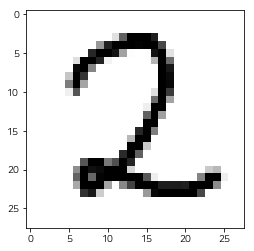

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("../data/two.png")
plt.imshow(img, cmap='gray_r')

In [13]:
img.size

(28, 28)

In [35]:
import numpy as np
img = np.resize(img, (28, 28))
test_img = ((np.array(img) / 255.0) -1) * -1
test_img = test_img.reshape(1, 28, 28, 1)
test_img.shape

(1, 28, 28, 1)

In [36]:
#test_data = (np.array(test_img) / 255.0)
pred = model.predict(test_img)
pred

array([[0.08601665, 0.11503415, 0.1008739 , 0.11915256, 0.09166544,
        0.07627501, 0.10602804, 0.12128069, 0.09181104, 0.09186252]],
      dtype=float32)

In [37]:
list(pred[0]).index(max(pred[0]))

7